In [12]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the path containing the SSGATE folder to sys.path
sys.path.append(os.path.join(current_dir, 'SSGATE'))

In [13]:
import sys
import os
import SSGATE as ssgate
import scanpy as sc

import torch
import matplotlib.pyplot as plt

In [3]:
# This tutorial is used to illustrate the steps of multi-omics integration of the SLN_111_D1 dataset.
# Import transcriptome and proteome data in h5ad format
adata_st = sc.read_h5ad('SLN_111_D1_RNA.h5ad')
adata_sp = sc.read_h5ad('SLN_111_D1_ADT.h5ad')

Original ST Data Info: 9264 cells * 13553 genes.


/opt/conda/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Original SP Data Info: 9264 cells * 112 genes.
         Falling back to preprocessing with `sc.pp.pca` and default params.


/opt/conda/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


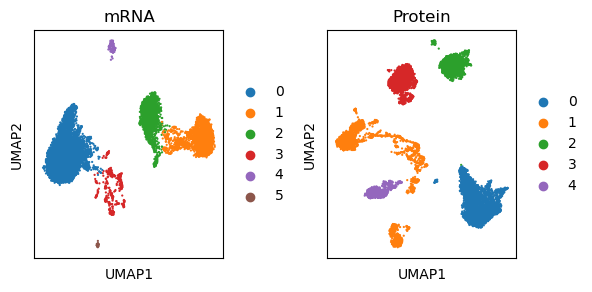

In [4]:
# The above data is not filtered or standardized by default, 
# and is preprocessed using the preprocessing function of SSGATE.
adata_st, adata_sp = ssgate.preprocess_cluster(adata_st, adata_sp, res_st = 0.05, res_sp = 0.01, show_fig = True, figsize = (6,3))

------Calculating spatial graph...
The graph contains 145398 edges, 9264 cells.
15.6949 neighbors per cell on average.
++++++Pruning the spatial graph!++++++
145398 edges before pruning.
144305 edges after pruning.


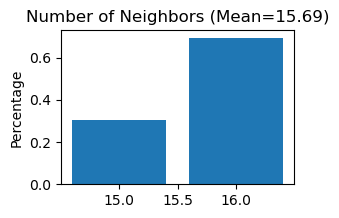

In [5]:
# Neighbor network construction, 
# network pruning, 
# and neighbor network statistics based on transcriptome data
adata_st = ssgate.Cal_Nbrs_Net(adata_st, feat = "X_pca", k_cutoff = 15, model = "KNN")
adata_st = ssgate.prune_net(adata_st)
ssgate.Stats_Nbrs_Net(adata_st)

------Calculating spatial graph...
The graph contains 144494 edges, 9264 cells.
15.5974 neighbors per cell on average.
++++++Pruning the spatial graph!++++++
144494 edges before pruning.
144103 edges after pruning.


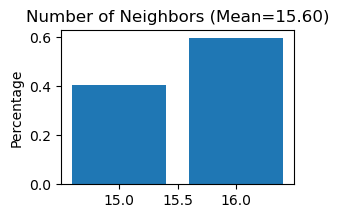

In [6]:
# Proteomic data are processed similarly to transcriptomic data
adata_sp = ssgate.Cal_Nbrs_Net(adata_sp, feat = "X_pca", k_cutoff = 15, model = "KNN")
adata_sp = ssgate.prune_net(adata_sp)
ssgate.Stats_Nbrs_Net(adata_sp)

  0%|          | 0/50 [00:00<?, ?it/s]/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
  0%|          | 0/250 [00:00<?, ?it/s]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7127397060394287 seconds
Jaccard graph constructed in 51.960511207580566 seconds
Wrote graph to binary file in 0.18758869171142578 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.875957
After 5 runs, maximum modularity is Q = 0.877206
Louvain completed 25 runs in 12.743040800094604 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 95.20357608795166 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.8429064750671387 seconds
Jaccard graph constructed in 32.52900147438049 seconds
Wrote graph to binary file in 0.16127443313598633 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.910988
Louvain completed 21 runs in 9.44264006614685 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 66.70132613182068 seconds


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
  4%|▍         | 10/250 [03:23<30:17,  7.57s/it]   

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 12.647524356842041 seconds
Jaccard graph constructed in 30.975728034973145 seconds
Wrote graph to binary file in 0.1497786045074463 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.878419
Louvain completed 21 runs in 9.41707181930542 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 87.14145803451538 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.7358996868133545 seconds
Jaccard graph constructed in 36.74317145347595 seconds
Wrote graph to binary file in 0.26351237297058105 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.909304
After 2 runs, maximum modularity is Q = 0.910645
After 18 runs, maximum modularity is Q = 0.911791
Louvain completed 38 runs in 17.53877067565918 seconds
Sorting communities by size, please wait ...
Phen

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 12%|█▏        | 30/250 [08:19<29:28,  8.04s/it]  

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.0898947715759277 seconds
Jaccard graph constructed in 31.947136402130127 seconds
Wrote graph to binary file in 0.16495442390441895 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.876512
After 2 runs, maximum modularity is Q = 0.879465
Louvain completed 22 runs in 9.956766128540039 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 69.8683123588562 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.8697690963745117 seconds
Jaccard graph constructed in 29.83754277229309 seconds
Wrote graph to binary file in 0.15159034729003906 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914372
Louvain completed 21 runs in 8.938011169433594 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 69.15791463851929 seconds


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 20%|██        | 50/250 [12:09<22:06,  6.63s/it]  

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.887859582901001 seconds
Jaccard graph constructed in 29.829566478729248 seconds
Wrote graph to binary file in 0.163071870803833 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.878576
Louvain completed 21 runs in 9.659364700317383 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 69.82850670814514 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 10.44399619102478 seconds
Jaccard graph constructed in 34.261616945266724 seconds
Wrote graph to binary file in 0.14581036567687988 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914378
After 15 runs, maximum modularity is Q = 0.915573
Louvain completed 35 runs in 14.609308004379272 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 89.04521632194519 seconds


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 28%|██▊       | 70/250 [16:13<12:50,  4.28s/it]  

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 3.1262781620025635 seconds
Jaccard graph constructed in 50.325359582901 seconds
Wrote graph to binary file in 0.15539836883544922 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.877271
After 2 runs, maximum modularity is Q = 0.878879
After 6 runs, maximum modularity is Q = 0.880326
Louvain completed 26 runs in 14.21387243270874 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 103.46588134765625 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.8165006637573242 seconds
Jaccard graph constructed in 41.66917705535889 seconds
Wrote graph to binary file in 0.2044522762298584 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.916074
Louvain completed 21 runs in 10.350903749465942 seconds
Sorting communities by size, please wait ...
Pheno

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 36%|███▌      | 90/250 [20:43<11:59,  4.50s/it]  

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.4079229831695557 seconds
Jaccard graph constructed in 30.524267196655273 seconds
Wrote graph to binary file in 0.15204787254333496 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.879603
Louvain completed 21 runs in 9.160861015319824 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 79.02591300010681 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.8506348133087158 seconds
Jaccard graph constructed in 30.490518808364868 seconds
Wrote graph to binary file in 0.18964242935180664 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.916502
Louvain completed 21 runs in 7.938527345657349 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 65.91337561607361 seconds


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 44%|████▍     | 110/250 [24:30<08:53,  3.81s/it] 

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7188546657562256 seconds
Jaccard graph constructed in 37.99496269226074 seconds
Wrote graph to binary file in 0.1525866985321045 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.878908
Louvain completed 21 runs in 9.666651248931885 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 86.88657236099243 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.8430037498474121 seconds
Jaccard graph constructed in 45.121196031570435 seconds
Wrote graph to binary file in 0.43871307373046875 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914749
After 3 runs, maximum modularity is Q = 0.915998
Louvain completed 23 runs in 14.91783332824707 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 96.87937784194946 seconds


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 52%|█████▏    | 130/250 [29:01<09:10,  4.58s/it]  

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7349610328674316 seconds
Jaccard graph constructed in 38.7866153717041 seconds
Wrote graph to binary file in 0.14788341522216797 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.876902
After 2 runs, maximum modularity is Q = 0.879381
Louvain completed 22 runs in 14.694721698760986 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 91.80544304847717 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.764901876449585 seconds
Jaccard graph constructed in 43.46698498725891 seconds
Wrote graph to binary file in 0.15405750274658203 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914537
After 14 runs, maximum modularity is Q = 0.915578
Louvain completed 34 runs in 14.46730089187622 seconds
Sorting communities by size, please wait ...
Phen

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 60%|██████    | 150/250 [33:41<06:59,  4.19s/it]  

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.8980200290679932 seconds
Jaccard graph constructed in 29.683444023132324 seconds
Wrote graph to binary file in 0.15459465980529785 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.880078
Louvain completed 21 runs in 10.956032991409302 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 68.73319578170776 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.0949492454528809 seconds
Jaccard graph constructed in 29.67057514190674 seconds
Wrote graph to binary file in 0.15058469772338867 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.915043
Louvain completed 21 runs in 8.610825061798096 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 65.89155316352844 seconds


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 68%|██████▊   | 170/250 [37:14<04:53,  3.67s/it]  

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.9436771869659424 seconds
Jaccard graph constructed in 47.14919304847717 seconds
Wrote graph to binary file in 0.16909098625183105 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.878644
After 7 runs, maximum modularity is Q = 0.880312
Louvain completed 27 runs in 17.613624095916748 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 110.87879014015198 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7279384136199951 seconds
Jaccard graph constructed in 44.832541704177856 seconds
Wrote graph to binary file in 0.14641165733337402 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.913904
After 2 runs, maximum modularity is Q = 0.915149
Louvain completed 22 runs in 10.923322916030884 seconds
Sorting communities by size, please wait ...


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 76%|███████▌  | 190/250 [42:00<03:49,  3.82s/it]  

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7572791576385498 seconds
Jaccard graph constructed in 33.6160888671875 seconds
Wrote graph to binary file in 0.15431618690490723 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.877579
After 3 runs, maximum modularity is Q = 0.878615
After 4 runs, maximum modularity is Q = 0.880002
Louvain completed 24 runs in 12.942309617996216 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 75.95101714134216 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7466301918029785 seconds
Jaccard graph constructed in 50.23324632644653 seconds
Wrote graph to binary file in 0.1522819995880127 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914479
Louvain completed 21 runs in 9.095839023590088 seconds
Sorting communities by size, please wait ...
Pheno

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 84%|████████▍ | 210/250 [46:09<02:29,  3.75s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.6988720893859863 seconds
Jaccard graph constructed in 30.457674980163574 seconds
Wrote graph to binary file in 0.17020630836486816 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.87675
After 2 runs, maximum modularity is Q = 0.878874
Louvain completed 22 runs in 12.206201791763306 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 78.3583071231842 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.9302897453308105 seconds
Jaccard graph constructed in 37.611095666885376 seconds
Wrote graph to binary file in 0.1521599292755127 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914532
Louvain completed 21 runs in 8.52402949333191 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 76.18800520896912 seconds


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 92%|█████████▏| 230/250 [49:56<01:11,  3.56s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.8215630054473877 seconds
Jaccard graph constructed in 43.85920429229736 seconds
Wrote graph to binary file in 0.15563416481018066 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.878265
Louvain completed 21 runs in 10.172019720077515 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 93.49115777015686 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.9652667045593262 seconds
Jaccard graph constructed in 38.350619316101074 seconds
Wrote graph to binary file in 0.16000652313232422 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914733
After 3 runs, maximum modularity is Q = 0.915893
Louvain completed 23 runs in 11.338268518447876 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 90.21677803993225 seconds


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
100%|██████████| 250/250 [54:16<00:00, 13.03s/it]


Ploting losses!


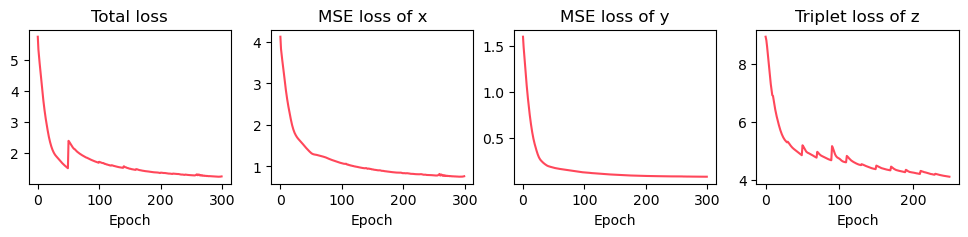

In [7]:
# After the nearest neighbor network is built, it is trained based on the above data, 
# and the integrated results obtained from the training are retained in the .obsm file of h5ad.
adata_st, adata_sp = ssgate.train(adata_st, adata_sp, 
                                  hidden_dims1 = 128, 
                                  hidden_dims2 = 128, 
                                  out_dims = 30,
                                  cluster_update_epoch = 20, 
                                  epochs_init = 50, 
                                  n_epochs=300, 
                                  save_reconstrction=False,
                                  sigma = 0.1, 
                                  device = "cuda:0", 
                                  feat1 = "PCA",
                                  key_added = 'ssgate_embed')

In [10]:
# Calculate neighbors and construct UMAP graph based on integrated low-dimensional embedding
sc.pp.neighbors(adata_st, use_rep="ssgate_embed",key_added='SSGATE_neighbor')
sc.tl.umap(adata_st,neighbors_key='SSGATE_neighbor')

/opt/conda/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


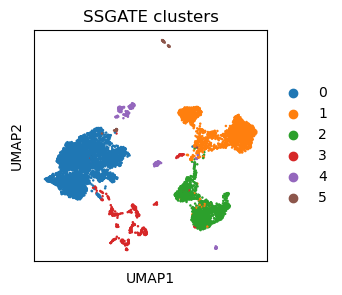

In [11]:
# Leiden cluster statistics and drawing UMAP graph
sc.tl.leiden(adata_st, resolution = 0.15, key_added = "ssgate_cluster")
plt.rcParams["figure.figsize"] = [3,3]
sc.pl.umap(adata_st, color=["ssgate_cluster"], title = "SSGATE clusters")